In [1]:
# Make sure torch version is cu118
!pip show torch

Name: torch
Version: 2.1.0+cu121
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, fsspec, jinja2, networkx, sympy, triton, typing-extensions
Required-by: fastai, torchaudio, torchdata, torchtext, torchvision


In [2]:
!pip uninstall torch

Found existing installation: torch 2.1.0+cu121
Uninstalling torch-2.1.0+cu121:
  Would remove:
    /usr/local/bin/convert-caffe2-to-onnx
    /usr/local/bin/convert-onnx-to-caffe2
    /usr/local/bin/torchrun
    /usr/local/lib/python3.10/dist-packages/functorch/*
    /usr/local/lib/python3.10/dist-packages/nvfuser/*
    /usr/local/lib/python3.10/dist-packages/torch-2.1.0+cu121.dist-info/*
    /usr/local/lib/python3.10/dist-packages/torch/*
    /usr/local/lib/python3.10/dist-packages/torchgen/*
Proceed (Y/n)? y
y
ERROR: Operation cancelled by user


In [3]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 811.7/811.7 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 51.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 53.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 728.5/728.5 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.1/204.1 MB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
!pip install -U accelerate
!pip install -U transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.9/270.9 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 18.4 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.35.2
    Uninstalling transformers-4.35.2:
      Successfully uninstalled transformers-4.35.2


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import ParameterGrid
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
import pandas as pd
import matplotlib.pyplot as plt

nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('sentiwordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.


True

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


LOADING DATASET

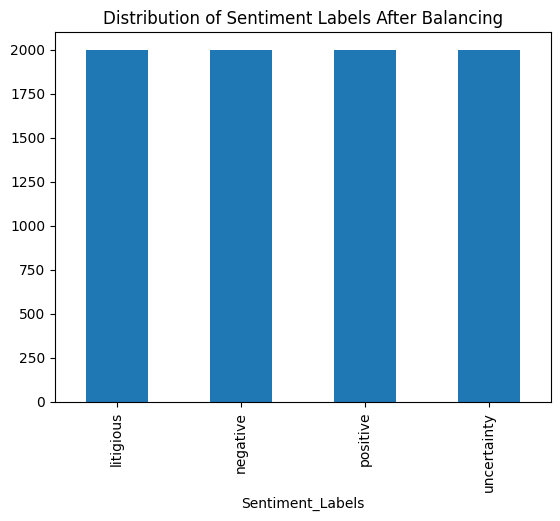

In [7]:
# Load the dataset
UnC_Data = pd.read_csv('/content/drive/MyDrive/FYP_Colab_Notebooks/Dataset/dataset.csv', low_memory=False)

# Filter only English tweets
UnC_Data = UnC_Data.query('Language == "en"')

# Convert all columns to string type
UnC_Data = UnC_Data.astype(str)

# Drop all rows with any NaN and NaT values
UnC_Data = UnC_Data.dropna()

# Only keep the text and label columns
UnC_Data = UnC_Data[['Text', 'Label']]

# Rename the "Label" column as "sentiment labels"
UnC_Data = UnC_Data.rename(columns={'Label': 'Sentiment_Labels'})

# Balancing the dataset
balanced_data = pd.DataFrame()

# Sample 2000 records for each label
for label in UnC_Data['Sentiment_Labels'].unique():
    label_data = UnC_Data[UnC_Data['Sentiment_Labels'] == label].sample(2000, replace=True)
    balanced_data = pd.concat([balanced_data, label_data])

# Visualize the distribution of the labels after balancing - Bar Chart
balanced_data.groupby(['Sentiment_Labels']).size().plot.bar()
plt.title('Distribution of Sentiment Labels After Balancing')
plt.show()


DATA PREPROCESSING

In [8]:
import re
import nltk
from nltk.corpus import stopwords

# Pre-compiling regular expressions
emoji_pattern = re.compile("["
                          u"\U0001F600-\U0001F64F"
                          u"\U0001F300-\U0001F5FF"
                          u"\U0001F680-\U0001F6FF"
                          u"\U0001F1E0-\U0001F1FF"
                          u"\U00002702-\U000027B0"
                          u"\U000024C2-\U0001F251"
                          "]+", flags=re.UNICODE)

stop_words = set(stopwords.words('english'))
lemmatizer = nltk.WordNetLemmatizer()

def clean_and_preprocess(tweet):
    if not isinstance(tweet, str):
        return ""

    # Combine regular expressions
    temp = re.sub(r'http\S+|@\S+|#|\[.*?\]|[()!?]', ' ', tweet.lower())
    temp = re.sub("[^a-z0-9\s]", " ", temp)

    # Lemmatization (NLTK library) using list comprehension
    words = [lemmatizer.lemmatize(word) for word in re.findall(r'\b\w+\b', temp) if word not in stop_words]

    # Join the list of words back into a sentence
    processed_sentence = " ".join(words)

    return processed_sentence

# Apply the clean_and_preprocess function to the "Text" column
C_Data = balanced_data.copy()
C_Data['Text'] = C_Data['Text'].apply(clean_and_preprocess)

In [ ]:
C_Data.head(5)

,Text,Sentiment_Labels
725244,culprit dealt according law land case peace di...,litigious
556187,woke feeling like weight world shoulder hr ema...,litigious
883682,congratulation new orleans partner pablo gonza...,litigious
556008,assist exist play wing 1 3 season,litigious
318271,play containment breach,litigious


In [9]:
# Map the labels to numerical values
label_mapping = {'positive': 0, 'negative': 1, 'uncertainty': 2, 'litigious': 3}

# Add a new column "Numerical_Labels" to the dataset
C_Data['Numerical_Labels'] = C_Data['Sentiment_Labels'].map(label_mapping)

# Alternatively, if you want to keep both columns, you can use the following:
C_Data['Numerical_Labels'] = C_Data['Sentiment_Labels'].map(label_mapping).astype('int')

# Set the maximum column width to a larger value
pd.set_option('display.max_colwidth', 1000)
C_Data.head(5)

,Text,Sentiment_Labels,Numerical_Labels
369010,case desertion refusal participate hostility becoming widespread armed force area settlement aleksandropol dpr 30 ukrainian serviceman one battalion 25th airborne brigade,litigious,3
5821,new reported phi breach jun 6 2022 memorial community health inc ne 1658 people affected hhs classified n hacking incident breach breached data came network server info,litigious,3
387672,four day go exciting come home swollen service taking place sunday 3rd july lighthouse chapel international entebbe cathedral get ready witness salvation miracle healing sure spread word come alone comehome,litigious,3
317540,walgreens pharmacy recently reached 683 million settlement state florida improperly dispensing painkiller opioid crisis continues know lawsuit attorney,litigious,3
319829,took criminal mind netflix cannot breathe,litigious,3


In [ ]:
# Save the preprocessed dataset to a CSV file for easier access
#C_Data.to_csv('C_Data.csv', index=False)

In [12]:
# Adding the labels to a list to map ID to label and label to ID
labels = C_Data['Sentiment_Labels'].unique().tolist()
labels = [s.strip() for s in labels ]

label_count = len(labels)

id2label = {id: label for id, label in enumerate(labels)}
label2id = {label: id for id, label in enumerate(labels)}

# Print the ID to label and label to ID mappings
print(id2label)
print(label2id)

{0: 'litigious', 1: 'positive', 2: 'negative', 3: 'uncertainty'}
{'litigious': 0, 'positive': 1, 'negative': 2, 'uncertainty': 3}


DATA SPLITTING

In [13]:
# labels = C_Data['Numerical_Labels']

# Split the dataset into train, test, and validation sets (8:1:1)
train_data, test_data = train_test_split(C_Data, test_size=0.2, random_state=42)
test_data, val_data = train_test_split(test_data, test_size=0.5, random_state=42)

# Save the train, test, and validation datasets to CSV files
train_data.to_csv("train_data.csv", index=False)
test_data.to_csv("test_data.csv", index=False)
val_data.to_csv("val_data.csv", index=False)

# Splitting the train, test, and validation datasets into text and label columns
SIZE= C_Data.shape[0]

train_texts = list(train_data['Text'])
val_texts = list(val_data['Text'])
test_texts = list(test_data['Text'])

# Extracting label columns
train_labels = list(train_data['Numerical_Labels'])
val_labels = list(val_data['Numerical_Labels'])
test_labels = list(test_data['Numerical_Labels'])

# Check the count of each dataset
print("Train data count:", train_data.shape[0])
print("Test data count:", test_data.shape[0])
print("Validation data count:", val_data.shape[0])

Train data count: 6400
Test data count: 800
Validation data count: 800


In [ ]:
# Visualize a few samples from test_texts and corresponding test_labels
print("\nSample Test Data:")
for text, label in zip(test_texts[:5], test_labels[:5]):
    print(f"Text: {text}\nLabel: {label}\n")

# Check the count of unique labels in the test set
unique_labels_test = set(test_labels)
print("Unique Labels in Test Data:", unique_labels_test)


Sample Test Data:
Text: 21 either rent sale rest rented sold yet moved vacation home repaired renovated stuck legal proceeding like divorce probate etc 8 500 unit rent sale many market gt 1mo
Label: 3

Text: know craziest dream know
Label: 0

Text: senate confirmation hearing become largely meaningless political theater nominee try avoid pinned almost anything response roe evasive yes norm far cry making criminal 16
Label: 3

Text: put brake light city wonder gonna play nice watch might go better think twice
Label: 2

Text: want add white want write marginalized character serious work getting premise vetted write story flawed premise cannot saved sr later
Label: 1

Unique Labels in Test Data: {0, 1, 2, 3}


In [14]:
# Setting DistilBERT tokenizer as 'tokenizer'
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english", max_length=128)

# Set model to DistilBERTForSequenceClassification
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english",
                                                            max_length=128,
                                                            num_labels=label_count,
                                                            id2label=id2label,
                                                            label2id=label2id,
                                                            ignore_mismatched_sizes=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([2]) in the checkpoint and torch.Size([4]) in the model instantiated
- classifier.weight: found shape torch.Size([2, 768]) in the checkpoint and torch.Size([4, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [15]:
max_length = 128

train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=max_length, return_tensors='pt')
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=max_length, return_tensors='pt')
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=max_length, return_tensors='pt')

In [16]:
class DataLoader(torch.utils.data.Dataset):

    def __init__(self, encodings, labels):

        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):

        # Retrieve tokenized data for the given index
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        # Add the label for the given index to the item dictionary
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):

        return len(self.labels)

train_dataloader = DataLoader(train_encodings, train_labels)
val_dataloader = DataLoader(val_encodings, val_labels)
test_dataset = DataLoader(test_encodings, test_labels)

# Define the hyperparameter grid for tuning
hyperparameter_grid = {
    'learning_rate': [2e-5, 1e-5],
    'num_train_epochs': [3, 4],
    'per_device_train_batch_size': [16, 32]
}

# Define the search space using ParameterGrid
param_grid = list(ParameterGrid(hyperparameter_grid))


# Define training arguments and other configurations
training_args = TrainingArguments(
    output_dir="./output",
    evaluation_strategy="steps",
    eval_steps=500,
    save_steps=500,
    logging_steps=240,
)

# Hyperparameter tuning loop
for params in param_grid:
    print(f"Training with hyperparameters: {params}")

    # Update training arguments with hyperparameters
    training_args.learning_rate = params['learning_rate']
    training_args.num_train_epochs = params['num_train_epochs']
    training_args.per_device_train_batch_size = params['per_device_train_batch_size']

    # Create a Trainer instance with the updated TrainingArguments
    trainer = Trainer(
        model=model,
        args=training_args,
        tokenizer=tokenizer,
        train_dataset=train_dataloader,
        eval_dataset=val_dataloader
    )

    # Train the model
    trainer.train()

    # Evaluate the model on the validation set or using cross-validation
    results = trainer.evaluate()

    # Log or store the results for later analysis
    print(f"Results: {results}")



Training with hyperparameters: {'learning_rate': 2e-05, 'num_train_epochs': 3, 'per_device_train_batch_size': 16}


<ipython-input-16-4ce61853cc94>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Step,Training Loss,Validation Loss
500,0.208500,0.159377
1000,0.100900,0.127447


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 128}
<ipython-input-16-4ce61853cc94>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 128}
<i

Results: {'eval_loss': 0.12918545305728912, 'eval_runtime': 1.3176, 'eval_samples_per_second': 607.15, 'eval_steps_per_second': 75.894, 'epoch': 3.0}
Training with hyperparameters: {'learning_rate': 2e-05, 'num_train_epochs': 3, 'per_device_train_batch_size': 32}


Step,Training Loss,Validation Loss
500,0.038300,0.179908


Checkpoint destination directory ./output/checkpoint-500 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 128}
<ipython-input-16-4ce61853cc94>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Results: {'eval_loss': 0.17669066786766052, 'eval_runtime': 1.3048, 'eval_samples_per_second': 613.138, 'eval_steps_per_second': 76.642, 'epoch': 3.0}
Training with hyperparameters: {'learning_rate': 2e-05, 'num_train_epochs': 4, 'per_device_train_batch_size': 16}


Step,Training Loss,Validation Loss
500,0.039200,0.277818
1000,0.008800,0.274376
1500,0.006800,0.289713


Checkpoint destination directory ./output/checkpoint-500 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 128}
<ipython-input-16-4ce61853cc94>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Checkpoint destination directory ./output/checkpoint-1000 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Some non-default generation parameters are set in the model

Results: {'eval_loss': 0.28999125957489014, 'eval_runtime': 1.3108, 'eval_samples_per_second': 610.302, 'eval_steps_per_second': 76.288, 'epoch': 4.0}
Training with hyperparameters: {'learning_rate': 2e-05, 'num_train_epochs': 4, 'per_device_train_batch_size': 32}


Step,Training Loss,Validation Loss
500,0.005200,0.311571


Checkpoint destination directory ./output/checkpoint-500 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 128}
<ipython-input-16-4ce61853cc94>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Results: {'eval_loss': 0.2949267327785492, 'eval_runtime': 1.2978, 'eval_samples_per_second': 616.418, 'eval_steps_per_second': 77.052, 'epoch': 4.0}
Training with hyperparameters: {'learning_rate': 1e-05, 'num_train_epochs': 3, 'per_device_train_batch_size': 16}


Step,Training Loss,Validation Loss
500,0.009800,0.363814
1000,0.002300,0.385049


Checkpoint destination directory ./output/checkpoint-500 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 128}
<ipython-input-16-4ce61853cc94>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Checkpoint destination directory ./output/checkpoint-1000 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Some non-default generation parameters are set in the model

Results: {'eval_loss': 0.36043375730514526, 'eval_runtime': 1.3728, 'eval_samples_per_second': 582.743, 'eval_steps_per_second': 72.843, 'epoch': 3.0}
Training with hyperparameters: {'learning_rate': 1e-05, 'num_train_epochs': 3, 'per_device_train_batch_size': 32}


Step,Training Loss,Validation Loss
500,0.000500,0.385410


Checkpoint destination directory ./output/checkpoint-500 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 128}
<ipython-input-16-4ce61853cc94>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Results: {'eval_loss': 0.38630926609039307, 'eval_runtime': 1.2951, 'eval_samples_per_second': 617.716, 'eval_steps_per_second': 77.214, 'epoch': 3.0}
Training with hyperparameters: {'learning_rate': 1e-05, 'num_train_epochs': 4, 'per_device_train_batch_size': 16}


Step,Training Loss,Validation Loss
500,0.005100,0.491232
1000,0.000700,0.479434
1500,0.007900,0.479735


Checkpoint destination directory ./output/checkpoint-500 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 128}
<ipython-input-16-4ce61853cc94>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Checkpoint destination directory ./output/checkpoint-1000 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Some non-default generation parameters are set in the model

Results: {'eval_loss': 0.4833635091781616, 'eval_runtime': 1.2997, 'eval_samples_per_second': 615.545, 'eval_steps_per_second': 76.943, 'epoch': 4.0}
Training with hyperparameters: {'learning_rate': 1e-05, 'num_train_epochs': 4, 'per_device_train_batch_size': 32}


Step,Training Loss,Validation Loss
500,0.001900,0.481054


Checkpoint destination directory ./output/checkpoint-500 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 128}
<ipython-input-16-4ce61853cc94>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Results: {'eval_loss': 0.46571189165115356, 'eval_runtime': 1.3057, 'eval_samples_per_second': 612.685, 'eval_steps_per_second': 76.586, 'epoch': 4.0}


In [17]:
model_path = 'initial_model'
trainer.save_model(model_path)
tokenizer.save_pretrained(model_path)

Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 128}


('initial_model/tokenizer_config.json',
 'initial_model/special_tokens_map.json',
 'initial_model/vocab.txt',
 'initial_model/added_tokens.json')

In [18]:
# Load test dataset (skip the header)
with open("test_data.csv", "r") as f:
    # Skip the header if present
    next(f)

    # Read the rest of the lines
    texts = [line.strip() for line in f]

# Load corresponding labels
labels = [label for label in labels]  # Update this line based on how you load labels

# Instantiate tokenizer and DistilBERT model
tokenizer = DistilBertTokenizer.from_pretrained(model_path)
model = DistilBertForSequenceClassification.from_pretrained(model_path)
model.eval()  # Put the model in evaluation mode

# Preprocess the data
tokenized_inputs = tokenizer(texts, return_tensors="pt", padding=True)

# Generate predictions
with torch.no_grad():  # Avoid computing gradients during inference
    outputs = model(**tokenized_inputs)
predictions = torch.argmax(outputs.logits, dim=1).tolist()

# Calculate metrics
accuracy = accuracy_score(test_labels, predictions)
precision = precision_score(test_labels, predictions, average="weighted")
recall = recall_score(test_labels, predictions, average="weighted")
f1 = f1_score(test_labels, predictions, average="weighted")

# Free up memory by deleting variables that are no longer needed
del tokenized_inputs, outputs

# Print results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.97125
Precision: 0.9714090030996725
Recall: 0.97125
F1-score: 0.9712648719921972


In [23]:
# Define the label-to-id mapping used during training
label2id = {'Positive': 0, 'Negative': 1, 'Uncertainty': 2, 'Litigious': 3}

# Create a reverse mapping (id-to-label) for converting numerical labels to string labels
id_to_label = {v: k for k, v in label2id.items()}

# Input sentence
input_sentence = "The plaintiff alleges a breach of contract by the defendant and is pursuing legal remedies for damages incurred."

# Tokenize the input
tokenized_input = tokenizer(input_sentence, return_tensors="pt")

# Generate predictions
with torch.no_grad():  # Avoid computing gradients during inference
    outputs = model(**tokenized_input)

# Obtain predicted probabilities
predicted_probabilities = torch.nn.functional.softmax(outputs.logits, dim=1)

# Get the predicted class (numerical label)
predicted_class = torch.argmax(predicted_probabilities, dim=1).item()

# Convert numerical label to string label using the reverse mapping
predicted_sentiment = id_to_label.get(predicted_class, "Unknown")

# Print results
print("Predicted Sentiment Class:", predicted_sentiment)
print("Predicted Probabilities:", predicted_probabilities.tolist())

Predicted Sentiment Class: Litigious
Predicted Probabilities: [[2.1305126551851572e-08, 9.11879638465507e-09, 7.497570564396483e-09, 1.0]]
